# Whole Genome TWAS w/f fusion and susie

## Steps

### WG Fusion Wgt computation

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/AC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/AC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --model bslmm blup lasso top1 enet \
  --job_size 1\
  --asso_mem "6G" \
  -J 40 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &
   
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/PCC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/PCC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --model bslmm blup lasso top1 enet \
  --job_size 1\
  --asso_mem "6G" \
  -J 40 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &
  
nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb twas_fusion  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno  /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt  \
  --wd /home/hs3163/Project/Genome_prior/DLPFC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename_region_list.txt \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --model bslmm blup lasso top1 enet \
  --job_size 1\
  --asso_mem "6G" \
  -J 200 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml -s build &

### prior with postive constraint
The codes used to produce the postive constraint: See the corresponding sections in Whole Genome prior estimation.ipynb


In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/wg_prior_genome.ipynb flash \
--molecular_pheno_dir /home/hs3163/Project/Genome_prior/data/molc_dir    \
--rds_list /home/hs3163/Project/Genome_prior/data/rds_list  \
--wd   /home/hs3163/Project/Genome_prior/constriant \
--name "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--constraint "Constraint" \
-s build &

nohup sos run ~/GIT/neuro-twas/Workflow/wg_prior_genome.ipynb ed \
--molecular_pheno_dir /home/hs3163/Project/Genome_prior/data/molc_dir    \
--rds_list /home/hs3163/Project/Genome_prior/data/rds_list  \
--wd   /home/hs3163/Project/Genome_prior/constriant \
--name "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--constraint "Constraint" \
-s build &



In [ ]:
### MV_susie with postive constraint prior for whole genome with teem

nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv    \
--molecular_pheno_dir "/home/hs3163/Project/Alz_WG/mv_wg/molecular_phenotype_list"   \
--region_list "/home/hs3163/Project/Alz_WG/mv_wg/wg_rds_list"  \
--wd "/home/hs3163/Project/Alz_WG/mv_wg"  \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename"  \
--container /mnt/mfs/statgen/containers/twas_latest.sif --impute TRUE  --job_size 1 \
--cv_times 100  \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds'\
-J 6 -q csg -c /mnt/mfs/statgen/pbs_template/csg.yml -s build &


/home/hs3163/Project/




nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv --molecular_pheno_dir "/home/hs3163/Project/Alz_WG/mv_wg/molecular_phenotype_list" --region_list "/home/hs3163/Project/Alz_WG/mv_wg/wg_rds_list" --wd "" --name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif --impute TRUE --job_size 1 --cv_times 100 --mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' -J 100 -q csg -c ~/GIT/neuro-twas/template/csg.yml csg.yml -s build &



### MV_susie with postive constraint

In [ ]:
sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv --molecular_pheno_dir mole_pheno_ls   --region_list cand_rgs.txt  --wd ./   --name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container gaow/twas --impute TRUE --cv_times 2  &



nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --job_size 1 --cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &


nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test \
--gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt  \
--molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
--wd /home/hs3163/Project/Alz/multi_mp/wgt/AC/ \
--genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
--region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
--region_name 1   --data_start 2   --window 500000 \
--weights_path /home/hs3163/Project/Alz/multi_mp/wgt/AC  \
--weights_list /home/hs3163/Project/Alz/multi_mp/wgt/AC/All_wgt_list.txt \
--container /mnt/mfs/statgen/containers/twas_latest.sif   --job_size 1  --asso_mem "50G"   -J 40 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml   -s build &




In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &




nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/rds_bf" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# TWAS for MV susie

Transforming the susie result into wgt RDat file


In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf \
--molecular_pheno_dir mole_pheno_ls   --region_list wg_rds_list_final  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &

nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv \
--molecular_pheno_dir mole_pheno_ls   --region_list to_be_cv_rg_ls  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &


nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv \
--molecular_pheno_dir mole_pheno_ls   --region_list cand_rgs.txt  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &


nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf_cv \
--molecular_pheno_dir mole_pheno_ls   --region_list cand_rgs.txt  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &




# Removed the 28 genes that produced error of dim(x) = 0

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb fusion_tf \
--molecular_pheno_dir mole_pheno_ls   --region_list wg_rds_list_final  --wd ./ \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" --container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE --cv_times 2  &


# Association test for the transformed wgt RDat file

In [ ]:

nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
  --wd /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/DLPFC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --weights_path /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/DLPFC \
  --weights_list /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/DLPFC/All_wgt_list.txt \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  --max_impute 1\
  --asso_mem "50G" \
  -J 40 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml \
  -s build &

nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
  --wd /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/PCC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --weights_path /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/PCC \
  --weights_list /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/PCC/All_wgt_list.txt \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  --max_impute 1\
  --asso_mem "50G" \
  -J 40 -q neurology -c /home/hs3163/GIT/neuro-twas/template/csg.yml \
  -s build &

nohup sos run ~/GIT/neuro-twas/Workflow/twas_fusion_susie.ipynb association_test  \
  --gwas_sumstat /home/hs3163/Project/Alz/data/AD_sumstats_Jansenetal_2019sept.txt \
  --molecular-pheno /home/hs3163/Project/Rosmap/data/gene_exp/DLPFC/geneTpmResidualsAgeGenderAdj_rename.txt \
  --wd /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC \
  --genotype_list /home/hs3163/Project/Rosmap/data/Rosmap_wgs_genotype_list.txt \
  --region_list /home/hs3163/Project/mwe/mv_susie_mwe/region_list \
  --region_name 1 \
  --data_start 2 \
  --window 500000 \
  --weights_path /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC \
  --weights_list /mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/All_wgt_list.txt \
  --container /mnt/mfs/statgen/containers/twas_latest.sif \
  --job_size 1\
  --max_impute 1\
  --asso_mem "50G" \
  -J 40 -q csg -c /home/hs3163/GIT/neuro-twas/template/csg.yml \
  -s build &





# Filter out the snps

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb snp_exclude \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list" \
--bed_list "/mnt/mfs/statgen/neuro-twas/mv_wg/cache_arch/" \
--extract_snp "~/Project/Alz/data/AD_sumstats_SNP" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# redo MV_susie

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/wg_rds_list_final" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# CV for the genes with sig TWAS result

In [ ]:
nohup sos run ~/GIT/neuro-twas/Workflow/mv_susie.ipynb mv_susie_cv \
--molecular_pheno_dir "/mnt/mfs/statgen/neuro-twas/mv_wg/molecular_phenotype_list" \
--region_list "/mnt/mfs/statgen/neuro-twas/mv_wg/to_be_cv_rg_ls" \
--wd "/mnt/mfs/statgen/neuro-twas/mv_wg/" \
--name_prefix "geneTpmResidualsAgeGenderAdj_rename" \
--container /mnt/mfs/statgen/containers/twas_latest.sif \
--impute TRUE \
--job_size 1 \
--cv_times 100 \
--mixture_prior '~/Project/Genome_prior/merge/output/geneTpmResidualsAgeGenderAdj_rename.Both.flash.FL_PC3.teem.UD_ED.rds' \
-J 200 -q csg -c ~/GIT/neuro-twas/template/csg.yml -s build &

# Whole Genome TWAS Data analysis

In [3]:
library(dplyr)
library(tibble)
library(readr)
library(ggplot2)
library(purrr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
gene_name = "~/Project/Alz/data/Alz_gene_list.txt"

In [5]:
gene = read_delim(gene_name, delim = "\t" )


── Column specification ────────────────────────────────────────────────────────
cols(
  gene = col_character(),
  ensembl_id = col_character(),
  chr = col_double()
)




In [6]:
gene

gene,ensembl_id,chr
<chr>,<chr>,<dbl>
ADAMTS4,ENSG00000158859,1
CR1,ENSG00000203710,1
BIN1,ENSG00000136717,2
INPP5D,ENSG00000168918,2
HESX1,ENSG00000163666,3
CLNK,ENSG00000109684,4
HS3ST1,ENSG00000002587,4
HLA-DRB1,ENSG00000196126,6
TREM2,ENSG00000095970,6


In [7]:

dir = "/mnt/mfs/statgen/neuro-twas/mv_wg/wgt/"
Proj = c("DLPFC","AC","PCC")
tmp = tibble(
  Proj_Name = Proj
)
analysis = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!TWAS.P %in% "     NA")%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = p.adjust(as.numeric(MODELCV.PV), method = "fdr") ,
      TWAS.P = as.numeric(TWAS.P),
      TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))%>%filter()),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [15]:
analysis%>%unnest(result_data_TWAS)%>%filter(ID %in% gene$ensembl_id )%>%select(-psed_gene,-result_data,-twas_gene)%>%filter(ID %in% c("ENSG00000196126","ENSG00000203710") )

Proj_Name,PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,⋯,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj,r2,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<list>,<list>
DLPFC,NA,ENSG00000203710,1,207496147,207641765,0.123768,1:207786828_A_G,-8.88,NA,⋯,1162,1162,mv_susie,0.140,9.920000e-04,8.88,6.77e-19,7.870125e-18,0.02726088,0.4872979
DLPFC,NA,ENSG00000196126,6,32578769,32589848,4.97e-01,6:32583813_A_G,-6.49,NA,⋯,7102,7102,mv_susie,0.540,2.883000e-20,4.19,2.85e-05,6.464634e-05,0.02726088,0.4872979
AC,NA,ENSG00000203710,1,207496147,207641765,0.011182,1:207786828_A_G,-8.88,NA,⋯,1162,1162,mv_susie,0.027,5.166667e-01,8.73,2.61e-18,2.427300e-17,0.03164588,0.4851217
AC,NA,ENSG00000196126,6,32578769,32589848,0.380091,6:32583813_A_G,-6.49,NA,⋯,7102,7102,mv_susie,0.540,1.302000e-16,3.99,6.53e-05,1.145830e-04,0.03164588,0.4851217
PCC,NA,ENSG00000203710,1,207496147,207641765,2.39e-02,1:207786828_A_G,-8.88,NA,⋯,1162,1162,mv_susie,0.048,4.727500e-01,8.87,7.48e-19,7.729333e-18,0.02878994,0.5563621
PCC,NA,ENSG00000196126,6,32578769,32589848,3.22e-01,6:32583813_A_G,-6.49,NA,⋯,7102,7102,mv_susie,0.610,1.767000e-14,4.12,3.87e-05,8.569286e-05,0.02878994,0.5563621


In [88]:
analysis%>%unnest(result_data_TWAS)%>%filter(ID %in% gene$ensembl_id )%>%saveRDS("~/mv_susie_cand.rds")

In [303]:
dir2 = "~/Project/Alz/"
tmp = tibble(
  Proj_Name = Proj
)
analysis2 = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result_arch/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!is.na(BEST.GWAS.ID))%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = p.adjust(as.numeric(MODELCV.PV), method = "fdr") ,TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)
analysis_comp = analysis2%>%select(Proj_Name,twas_gene,result_data_TWAS,r2,pval)%>%mutate(
    idx = c(1,3,2),
    susie_r2 = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+3+.y)])),
    susie_pval = map2(twas_gene,idx, ~ ((working%>%filter(ID %in% .x)%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC))[,c(1,2+.y)])),
    sum_data = map2(result_data_TWAS,susie_r2, ~ inner_join(.x,.y )%>%
                    mutate(r2_more = .[,ncol(.)] > MODELCV.R2%>%as.numeric() )),
    sum_data = map2(sum_data,susie_pval, ~ inner_join(.x,.y )%>%
                    mutate(pv_less = .[,ncol(.)] < MODELCV.PV%>%as.numeric() )),
    sum_data = map(sum_data,~.x%>%
                   mutate(both_win = (r2_more & pv_less) ) ),
    pcnt_pv_win = map_dbl(sum_data, ~.x%>%pull(pv_less)%>%na.omit%>%mean()  ),
    pcnt_r2_win = map_dbl(sum_data, ~.x%>%pull(r2_more)%>%na.omit%>%mean()  ),
    pcnt_both_win = map_dbl(sum_data, ~.x%>%filter(both_win )%>%nrow()/nrow(.x) )
    )%>%select(-twas_gene,-idx)
analysis_comp%>%select(Proj_Name,pcnt_pv_win,pcnt_r2_win,pcnt_both_win)

Parsed with column specification:
cols(
  .default = col_character(),
  PANEL = col_logical(),
  CHR = col_double(),
  P0 = col_double(),
  P1 = col_double(),
  HSQ = col_double(),
  BEST.GWAS.ID = col_double(),
  EQTL.ID = col_logical(),
  EQTL.R2 = col_logical(),
  EQTL.Z = col_logical(),
  EQTL.GWAS.Z = col_logical(),
  MODELCV.R2 = col_logical(),
  MODELCV.PV = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“252 parsing failures.
 row   col           expected actual                                                                            file
1693 PANEL 1/0/T/F/TRUE/FALSE  PANEL '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result_arch/all_result.txt'
1693 CHR   a double            CHR   '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result_arch/all_result.txt'
1693 P0    a double            P0    '/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/DLPFC/result_arch/all_result.txt'
1693 P1    a double            P1    '/mnt/mfs/statgen/neuro

Proj_Name,pcnt_pv_win,pcnt_r2_win,pcnt_both_win
<chr>,<dbl>,<dbl>,<dbl>
DLPFC,NaN,NaN,0
AC,NaN,NaN,0
PCC,NaN,NaN,0


In [87]:
total = attach("~/Project/Alz/muti_mp_3/mv_cv.RData")
data = total$output
working = data%>%select(-path)
working = working%>%mutate(
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  hsq_ac = map_dbl(model,~.x$hsq[1]),
  hsq_PCC = map_dbl(model,~.x$hsq[2]),
  hsq_DLPFC = map_dbl(model,~.x$hsq[3]),
  total_cs_size = map_dbl(model,(~.x$sets$cs%>%unlist()%>%length())),
  mean_cs_size = total_cs_size/n_of_cs
)
working = working%>%mutate(
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]%>%round(3)),
  r2_PCC = map_dbl(model,~.x$r2[2]%>%round(3)),
  r2_DLPFC = map_dbl(model,~.x$r2[3]%>%round(3)),
 pval_ac = map_dbl(model,~.x$pval[1]%>%p.adjust( method = "fdr")),
 pval_PCC = map_dbl(model,~.x$pval[2]%>%p.adjust( method = "fdr")),
 pval_DLPFC = map_dbl(model,~.x$pval[3]%>%p.adjust( method = "fdr"))
)

The following object is masked from file:~/Project/Alz/muti_mp_3/mv_cv.RData (pos = 3):

    output




In [ ]:
result_data = read_delim("/mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/result/all_result.txt","\t")

In [22]:
result_data%>%filter(!TWAS.Z %in% "     NA")

PANEL,FILE,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P
<lgl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000008118.mv.wgt.RDat,ENSG00000008118,1,209583714,209613939,5.86e-03,1853,3.50,NA,NA,NA,NA,2381,2381,mv_susie,NA,NA,0.7297,0.46554
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000009307.mv.wgt.RDat,ENSG00000009307,1,114716913,114758676,3.68e-05,1740,-3.06,NA,NA,NA,NA,2281,2281,mv_susie,NA,NA,1.1072,0.26820
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000011021.mv.wgt.RDat,ENSG00000011021,1,11806096,11848079,3.31e-03,527,3.85,NA,NA,NA,NA,2921,2921,mv_susie,NA,NA,-0.9225,0.35626
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000020129.mv.wgt.RDat,ENSG00000020129,1,35557473,35567274,8.00e-05,1549,4.35,NA,NA,NA,NA,1833,1833,mv_susie,NA,NA,0.4324,0.66549
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000036549.mv.wgt.RDat,ENSG00000036549,1,77562416,77683419,4.11e-04,911,3.05,NA,NA,NA,NA,2762,2762,mv_susie,NA,NA,0.5151,0.60648
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000040487.mv.wgt.RDat,ENSG00000040487,1,19312326,19329300,1.31e-02,3993,-3.70,NA,NA,NA,NA,3240,3240,mv_susie,NA,NA,1.1860,0.23563
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000053371.mv.wgt.RDat,ENSG00000053371,1,19303965,19312146,1.00e-02,4060,-3.68,NA,NA,NA,NA,3236,3236,mv_susie,NA,NA,0.3238,0.74613
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000053372.mv.wgt.RDat,ENSG00000053372,1,19251805,19260128,4.98e-02,2575,-3.37,NA,NA,NA,NA,3226,3226,mv_susie,NA,NA,-1.3089,0.19056
NA,///mnt/mfs/statgen/neuro-twas/mv_wg/wgt/AC/geneTpmResidualsAgeGenderAdj_rename.ENSG00000054282.mv.wgt.RDat,ENSG00000054282,1,243256034,243500091,6.20e-02,3236,4.03,NA,NA,NA,NA,2514,2514,mv_susie,NA,NA,0.0829,0.93393


In [247]:
cv_gene = read_delim("/mnt/mfs/statgen/neuro-twas/mv_wg//to_be_cv_rg_ls_anno",delim = "\t")
cv_gene = cv_gene%>%select(ID = gene_ID, name = name)

Parsed with column specification:
cols(
  `#chr` = col_double(),
  start_position = col_double(),
  end_position = col_double(),
  gene_ID = col_character(),
  name = col_character()
)



In [46]:
dir = "/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/"
Proj = c("PCC","DLPFC","AC")
tmp = tibble(
  Proj_Name = Proj
)
analysis = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!TWAS.P %in% "     NA")%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = as.numeric(MODELCV.PV) ,
      TWAS.P = as.numeric(TWAS.P),
      TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)

dir = "/mnt/mfs/statgen/neuro-twas/mv_wg/wgt_pre_cv/"
Proj = c("PCC","DLPFC","AC")
tmp = tibble(
  Proj_Name = Proj
)
analysis_arch = tmp%>%mutate(
  result_data = map(Proj_Name,~read_delim(paste(dir,.x,"/result/all_result.txt",sep = ""),delim = "\t")%>%filter(FILE!="FILE")),
  result_data_TWAS = map(result_data,~.x%>%filter(!TWAS.P %in% "     NA")%>%select(-FILE)%>%mutate(
      MODELCV.R2 = as.numeric(MODELCV.R2),
      MODELCV.PV = as.numeric(MODELCV.PV) ,
      TWAS.P = as.numeric(TWAS.P),
      TWAS.P.Adj = p.adjust(TWAS.P, method = "fdr"))),
        twas_gene = map(result_data_TWAS,~.x$ID),
        psed_gene = map(result_data_TWAS,~.x%>%filter(TWAS.P.Adj<0.05)),
        r2 = map(result_data_TWAS,~.x%>%pull(MODELCV.R2)%>%as.numeric%>%na.omit()%>%mean()),
        pval = map(result_data_TWAS,~.x%>%pull(MODELCV.PV)%>%as.numeric%>%na.omit()%>%mean())
)

Parsed with column specification:
cols(
  .default = col_character(),
  PANEL = col_logical(),
  CHR = col_double(),
  P0 = col_double(),
  P1 = col_double(),
  HSQ = col_double(),
  EQTL.ID = col_logical(),
  EQTL.R2 = col_logical(),
  EQTL.Z = col_logical(),
  EQTL.GWAS.Z = col_logical(),
  MODELCV.R2 = col_logical(),
  MODELCV.PV = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“231 parsing failures.
 row   col           expected actual                                                                          file
1689 PANEL 1/0/T/F/TRUE/FALSE  PANEL '/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/PCC/result/all_result.txt'
1689 CHR   a double            CHR   '/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/PCC/result/all_result.txt'
1689 P0    a double            P0    '/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/PCC/result/all_result.txt'
1689 P1    a double            P1    '/mnt/mfs/statgen/neuro-twas/whole_genome_0504/wgt/PCC/result/

In [144]:
b = c(analysis2$result_data_TWAS[[1]]%>%pull(ID),
analysis2$result_data_TWAS[[2]]%>%pull(ID),
analysis2$result_data_TWAS[[3]]%>%pull(ID) )

In [62]:
analysis$result_data_TWAS[[1]]%>%filter(TWAS.P.Adj < 0.05)
analysis$result_data_TWAS[[2]]%>%filter(TWAS.P.Adj < 0.05)
analysis$result_data_TWAS[[3]]%>%filter(TWAS.P.Adj < 0.05)

analysis_arch$result_data_TWAS[[1]]%>%filter(TWAS.P.Adj < 0.05)
analysis_arch$result_data_TWAS[[2]]%>%filter(TWAS.P.Adj < 0.05)
analysis_arch$result_data_TWAS[[3]]%>%filter(TWAS.P.Adj < 0.05)

PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NA,ENSG00000076864,1,21596215,21669363,0.000119,1:21823292_C_T,4.365,NA,NA,NA,NA,1231,1231,mv_susie,NA,NA,3.702207,2.14e-04,3.555547e-02
NA,ENSG00000143224,1,161166056,161178013,0.004470,1:161155392_A_G,6.370,NA,NA,NA,NA,1203,1203,mv_susie,NA,NA,-4.341726,1.41e-05,3.885410e-03
NA,ENSG00000158864,1,161197104,161214395,0.024000,1:161155392_A_G,6.370,NA,NA,NA,NA,1204,1204,mv_susie,NA,NA,-6.273046,3.54e-10,2.666328e-07
NA,ENSG00000158869,1,161215234,161220699,0.004530,1:161155392_A_G,6.370,NA,NA,NA,NA,1225,1225,mv_susie,NA,NA,-6.368270,1.91e-10,1.541370e-07
NA,ENSG00000162755,1,161098361,161100346,0.001160,1:161155392_A_G,6.370,NA,NA,NA,NA,1196,1196,mv_susie,NA,NA,-3.654285,2.58e-04,4.048450e-02
NA,ENSG00000203710,1,207496147,207641765,0.131000,1:207786828_A_G,-8.878,NA,NA,NA,NA,933,933,mv_susie,NA,NA,9.127149,7.03e-20,9.928117e-17
NA,ENSG00000110077,11,60172014,60184666,0.000824,11:59958380_A_C,-8.01,NA,NA,NA,NA,1174,1174,mv_susie,NA,NA,5.317936,1.05e-07,4.942875e-05
NA,ENSG00000110079,11,60185702,60317944,0.027100,11:59958380_A_C,-8.01,NA,NA,NA,NA,1185,1185,mv_susie,NA,NA,5.673526,1.40e-08,8.324842e-06
NA,ENSG00000166927,11,60378485,60395951,0.002110,11:59958380_A_C,-8.01,NA,NA,NA,NA,1252,1252,mv_susie,NA,NA,4.273821,1.92e-05,4.930036e-03


PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NA,ENSG00000076864,1,21596215,21669363,6.66e-05,1:21823292_C_T,4.365,NA,NA,NA,NA,1231,1231,mv_susie,NA,NA,3.82262,1.32e-04,2.444813e-02
NA,ENSG00000143224,1,161166056,161178013,3.65e-03,1:161155392_A_G,6.370,NA,NA,NA,NA,1203,1203,mv_susie,NA,NA,-4.29513,1.75e-05,4.822317e-03
NA,ENSG00000158796,1,161120974,161132688,1.46e-04,1:161155392_A_G,6.370,NA,NA,NA,NA,1210,1210,mv_susie,NA,NA,-3.74932,1.77e-04,3.124603e-02
NA,ENSG00000158864,1,161197104,161214395,8.01e-03,1:161155392_A_G,6.370,NA,NA,NA,NA,1204,1204,mv_susie,NA,NA,-6.27353,3.53e-10,2.345996e-07
NA,ENSG00000158869,1,161215234,161220699,1.42e-03,1:161155392_A_G,6.370,NA,NA,NA,NA,1225,1225,mv_susie,NA,NA,-6.38492,1.71e-10,1.207474e-07
NA,ENSG00000162755,1,161098361,161100346,4.88e-04,1:161155392_A_G,6.370,NA,NA,NA,NA,1196,1196,mv_susie,NA,NA,-4.01608,5.92e-05,1.238596e-02
NA,ENSG00000203710,1,207496147,207641765,2.25e-02,1:207786828_A_G,-8.878,NA,NA,NA,NA,933,933,mv_susie,NA,NA,9.08997,9.91e-20,1.119632e-16
NA,ENSG00000110077,11,60172014,60184666,2.59e-04,11:59958380_A_C,-8.01,NA,NA,NA,NA,1174,1174,mv_susie,NA,NA,3.776331,1.59e-04,2.851400e-02
NA,ENSG00000110079,11,60185702,60317944,9.55e-03,11:59958380_A_C,-8.01,NA,NA,NA,NA,1185,1185,mv_susie,NA,NA,5.667082,1.45e-08,9.101167e-06


PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NA,ENSG00000076864,1,21596215,21669363,0.000103,1:21823292_C_T,4.365,NA,NA,NA,NA,1231,1231,mv_susie,NA,NA,3.75e+00,1.75e-04,2.865435e-02
NA,ENSG00000143224,1,161166056,161178013,0.010300,1:161155392_A_G,6.370,NA,NA,NA,NA,1203,1203,mv_susie,NA,NA,-4.29e+00,1.76e-05,4.347274e-03
NA,ENSG00000158796,1,161120974,161132688,0.000305,1:161155392_A_G,6.370,NA,NA,NA,NA,1210,1210,mv_susie,NA,NA,-3.76e+00,1.72e-04,2.865435e-02
NA,ENSG00000158864,1,161197104,161214395,0.013500,1:161155392_A_G,6.370,NA,NA,NA,NA,1204,1204,mv_susie,NA,NA,-6.27e+00,3.55e-10,2.673860e-07
NA,ENSG00000158869,1,161215234,161220699,0.016500,1:161155392_A_G,6.370,NA,NA,NA,NA,1225,1225,mv_susie,NA,NA,-6.34e+00,2.37e-10,1.912590e-07
NA,ENSG00000162755,1,161098361,161100346,0.000835,1:161155392_A_G,6.370,NA,NA,NA,NA,1196,1196,mv_susie,NA,NA,-4.52e+00,6.26e-06,1.861197e-03
NA,ENSG00000203710,1,207496147,207641765,0.015000,1:207786828_A_G,-8.878,NA,NA,NA,NA,933,933,mv_susie,NA,NA,8.74e+00,2.40e-18,3.012800e-15
NA,ENSG00000110077,11,60172014,60184666,0.000472,11:59958380_A_C,-8.01,NA,NA,NA,NA,1174,1174,mv_susie,NA,NA,4.81528,1.47e-06,5.726917e-04
NA,ENSG00000110079,11,60185702,60317944,0.023700,11:59958380_A_C,-8.01,NA,NA,NA,NA,1185,1185,mv_susie,NA,NA,5.66646,1.46e-08,9.163933e-06


PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NA,ENSG00000076864,1,21596215,21669363,8.19e-05,915,4.365,NA,NA,NA,NA,1348,1348,mv_susie,NA,NA,3.809901,1.39e-04,2.768497e-02
NA,ENSG00000143224,1,161166056,161178013,3.50e-03,664,6.370,NA,NA,NA,NA,1218,1218,mv_susie,NA,NA,-4.300877,1.70e-05,5.455111e-03
NA,ENSG00000158796,1,161120974,161132688,1.46e-04,736,6.370,NA,NA,NA,NA,1215,1215,mv_susie,NA,NA,-3.740973,1.83e-04,3.321200e-02
NA,ENSG00000158864,1,161197104,161214395,8.01e-03,599,6.370,NA,NA,NA,NA,1238,1238,mv_susie,NA,NA,-6.273714,3.53e-10,2.718571e-07
NA,ENSG00000158869,1,161215234,161220699,1.39e-03,582,6.370,NA,NA,NA,NA,1232,1232,mv_susie,NA,NA,-6.367851,1.92e-10,1.584274e-07
NA,ENSG00000162755,1,161098361,161100346,4.95e-04,769,6.370,NA,NA,NA,NA,1198,1198,mv_susie,NA,NA,-4.014789,5.95e-05,1.402743e-02
NA,ENSG00000203710,1,207496147,207641765,2.39e-02,784,-8.878,NA,NA,NA,NA,1162,1162,mv_susie,NA,NA,8.867486,7.48e-19,9.600996e-16
NA,ENSG00000110077,11,60172014,60184666,2.67e-04,311,-8.01,NA,NA,NA,NA,1188,1188,mv_susie,NA,NA,3.74299,1.82e-04,3.321200e-02
NA,ENSG00000110079,11,60185702,60317944,1.03e-02,307,-8.01,NA,NA,NA,NA,1353,1353,mv_susie,NA,NA,5.66446,1.47e-08,1.061340e-05


PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NA,ENSG00000076864,1,21596215,21669363,0.000149,915,4.365,NA,NA,NA,NA,1348,1348,mv_susie,NA,NA,3.65e+00,2.61e-04,4.369670e-02
NA,ENSG00000143224,1,161166056,161178013,0.004430,664,6.370,NA,NA,NA,NA,1218,1218,mv_susie,NA,NA,-4.35e+00,1.39e-05,4.460356e-03
NA,ENSG00000158864,1,161197104,161214395,0.023700,599,6.370,NA,NA,NA,NA,1238,1238,mv_susie,NA,NA,-6.27e+00,3.53e-10,3.136812e-07
NA,ENSG00000158869,1,161215234,161220699,0.004570,582,6.370,NA,NA,NA,NA,1232,1232,mv_susie,NA,NA,-6.35e+00,2.12e-10,2.040853e-07
NA,ENSG00000162755,1,161098361,161100346,0.001210,769,6.370,NA,NA,NA,NA,1198,1198,mv_susie,NA,NA,-3.63e+00,2.79e-04,4.604297e-02
NA,ENSG00000203710,1,207496147,207641765,0.124000,784,-8.878,NA,NA,NA,NA,1162,1162,mv_susie,NA,NA,8.88e+00,6.77e-19,9.775880e-16
NA,ENSG00000110077,11,60172014,60184666,0.000887,311,-8.01,NA,NA,NA,NA,1188,1188,mv_susie,NA,NA,5.30292,1.14e-07,6.584640e-05
NA,ENSG00000110079,11,60185702,60317944,0.027200,307,-8.01,NA,NA,NA,NA,1353,1353,mv_susie,NA,NA,5.67128,1.42e-08,1.025240e-05
NA,ENSG00000166927,11,60378485,60395951,0.002300,85,-8.01,NA,NA,NA,NA,1268,1268,mv_susie,NA,NA,4.21936,2.45e-05,7.257026e-03


PANEL,ID,CHR,P0,P1,HSQ,BEST.GWAS.ID,BEST.GWAS.Z,EQTL.ID,EQTL.R2,EQTL.Z,EQTL.GWAS.Z,NSNP,NWGT,MODEL,MODELCV.R2,MODELCV.PV,TWAS.Z,TWAS.P,TWAS.P.Adj
<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
NA,ENSG00000076864,1,21596215,21669363,1.27e-04,915,4.365,NA,NA,NA,NA,1348,1348,mv_susie,NA,NA,3.75717,1.72e-04,3.153879e-02
NA,ENSG00000143224,1,161166056,161178013,1.03e-02,664,6.370,NA,NA,NA,NA,1218,1218,mv_susie,NA,NA,-4.29787,1.72e-05,4.730819e-03
NA,ENSG00000158796,1,161120974,161132688,3.12e-04,736,6.370,NA,NA,NA,NA,1215,1215,mv_susie,NA,NA,-3.74425,1.81e-04,3.267050e-02
NA,ENSG00000158864,1,161197104,161214395,1.38e-02,599,6.370,NA,NA,NA,NA,1238,1238,mv_susie,NA,NA,-6.27286,3.54e-10,2.726272e-07
NA,ENSG00000158869,1,161215234,161220699,1.73e-02,582,6.370,NA,NA,NA,NA,1232,1232,mv_susie,NA,NA,-6.32637,2.51e-10,2.071109e-07
NA,ENSG00000162755,1,161098361,161100346,8.52e-04,769,6.370,NA,NA,NA,NA,1198,1198,mv_susie,NA,NA,-4.52437,6.06e-06,2.121367e-03
NA,ENSG00000203710,1,207496147,207641765,1.12e-02,784,-8.878,NA,NA,NA,NA,1162,1162,mv_susie,NA,NA,8.72730,2.61e-18,3.015072e-15
NA,ENSG00000110077,11,60172014,60184666,4.95e-04,311,-8.01,NA,NA,NA,NA,1188,1188,mv_susie,NA,NA,4.802384,1.57e-06,6.975631e-04
NA,ENSG00000110079,11,60185702,60317944,2.38e-02,307,-8.01,NA,NA,NA,NA,1353,1353,mv_susie,NA,NA,5.663557,1.48e-08,1.005704e-05


In [148]:
b = b%>%unique

In [127]:
a%>%as.tibble()%>%write_delim("/mnt/mfs/statgen/neuro-twas/to_be_cv_rg_ls",delim = "\t")

In [150]:
sum(a %in% b)

[1] 84

In [254]:
a = analysis$result_data_TWAS[[1]]%>%pull(ID)
b = analysis$result_data_TWAS[[2]]%>%pull(ID)
c = analysis$result_data_TWAS[[3]]%>%pull(ID)

In [256]:
shared = a[a[a%in%b]%in%c]
length(shared)


[1] 68

In [282]:
top_twas = rbind(
analysis$result_data_TWAS[[1]]%>%filter(! ID %in% working$ID )%>%mutate(Name = name,Tissue = "AC"),
analysis$result_data_TWAS[[2]]%>%filter(! ID %in% working$ID )%>%mutate(Name = name,Tissue = "DLPFC"),
analysis$result_data_TWAS[[3]]%>%filter(! ID %in% working$ID )%>%mutate(Name = name,Tissue = "PCC"))%>%write_delim("~/top_twas",delim = "\t")


ERROR while rich displaying an object: Error in dyn.load(file, DLLpath = DLLpath, ...): unable to load shared object '/mnt/mfs/hgrcgrid/homes/hs3163/miniconda3/lib/R/library/stringi/libs/stringi.so':
  libicui18n.so.58: cannot open shared object file: No such file or directory

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .

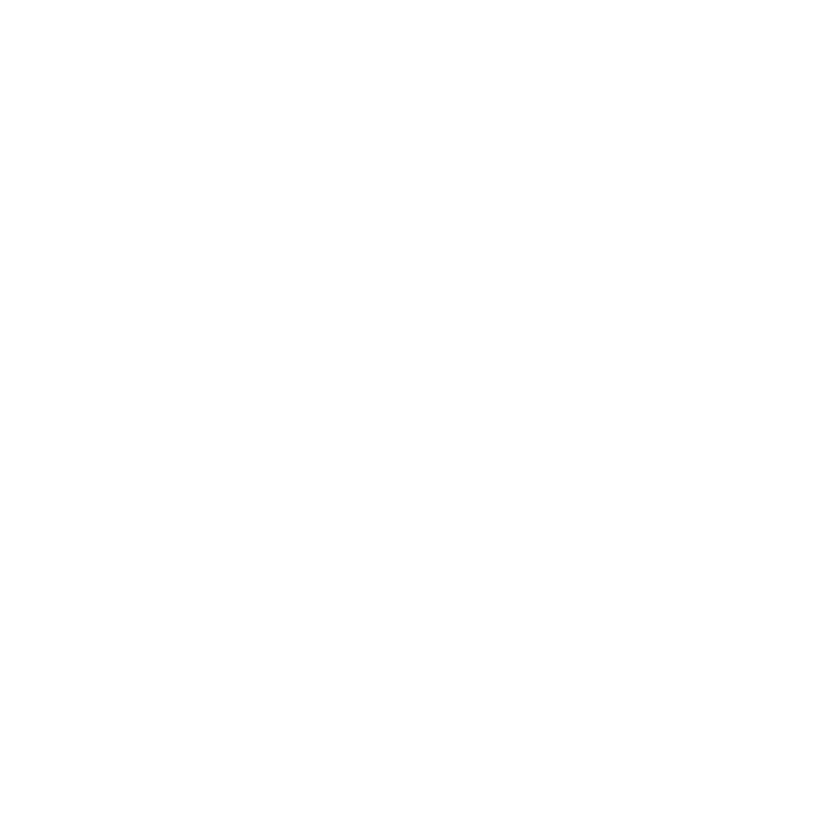

In [280]:
top_twas%>%ggplot(aes(x = reorder(Name,-log(TWAS.P.Adj)), y = Name) )+geom_col()+coord_flip()+facet_grid()



In [194]:
working%>%filter(ID %in% working2$ID )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)

ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000007255,0,3.733568e-01,5.536063e-01,5.806568e-01,0.004,-0.003,-0.003
ENSG00000064666,2,1.038169e-02,5.333433e-03,1.682692e-03,0.086,0.106,0.101
ENSG00000066923,0,4.741720e-01,3.154219e-01,5.371908e-01,0.000,0.012,-0.001
ENSG00000069399,0,5.874498e-01,5.404216e-01,6.036468e-01,-0.003,-0.003,-0.003
ENSG00000073008,1,6.811019e-03,2.171802e-02,1.148262e-02,0.096,0.079,0.063
ENSG00000099377,0,5.624515e-01,5.556673e-01,3.221032e-01,-0.003,-0.003,0.006
ENSG00000100599,0,4.760606e-01,3.956530e-01,2.495076e-01,0.002,0.007,0.011
ENSG00000103496,1,6.611386e-02,4.276323e-02,1.130364e-01,0.037,0.063,0.022
ENSG00000103510,1,5.403043e-03,2.809294e-02,7.390556e-03,0.091,0.077,0.062


In [186]:
cv_dat = attach("/mnt/mfs/statgen/neuro-twas/mv_wg/mv_cv.RData")

The following object is masked from file:~/Project/Alz/muti_mp_3/mv_cv.RData (pos = 3):

    output


The following object is masked from file:~/Project/Alz/muti_mp_3/mv_cv.RData (pos = 4):

    output




In [188]:
cv_dat$output

In [189]:
working2 = cv_dat$output%>%select(-path)
working2 = working2%>%mutate(
  n_of_cs = map_dbl(model,~.x$sets$cs_index%>%length()),
  hsq_ac = map_dbl(model,~.x$hsq[1]),
  hsq_PCC = map_dbl(model,~.x$hsq[2]),
  hsq_DLPFC = map_dbl(model,~.x$hsq[3]),
  total_cs_size = map_dbl(model,(~.x$sets$cs%>%unlist()%>%length())),
  mean_cs_size = total_cs_size/n_of_cs
)
working2 = working2%>%mutate(
  rmse_ac = map_dbl(model,~.x$rmse[1]),
  rmse_PCC = map_dbl(model,~.x$rmse[2]),
  rmse_DLPFC = map_dbl(model,~.x$rmse[3]),
  r2_ac = map_dbl(model,~.x$r2[1]%>%round(3)),
  r2_PCC = map_dbl(model,~.x$r2[2]%>%round(3)),
  r2_DLPFC = map_dbl(model,~.x$r2[3]%>%round(3)),
 pval_ac = map_dbl(model,~.x$pval[1]%>%p.adjust( method = "fdr")),
 pval_PCC = map_dbl(model,~.x$pval[2]%>%p.adjust( method = "fdr")),
 pval_DLPFC = map_dbl(model,~.x$pval[3]%>%p.adjust( method = "fdr"))
)

In [204]:
gene = working2%>%filter(ID %in% working$ID )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%pull(ID)
working%>%filter(ID %in% working2$ID )%>%select(ID,n_of_cs,pval_ac,pval_PCC,pval_DLPFC,r2_ac,r2_PCC,r2_DLPFC)%>%pull(pval_ac)%>%mean

[1] 0.3157206

In [205]:
gene

[1] "ENSG00000007255" "ENSG00000064666" "ENSG00000066923" "ENSG00000069399"
 [5] "ENSG00000073008" "ENSG00000099377" "ENSG00000100599" "ENSG00000103496"
 [9] "ENSG00000103510" "ENSG00000103549" "ENSG00000104853" "ENSG00000104856"
[13] "ENSG00000106290" "ENSG00000110077" "ENSG00000110079" "ENSG00000120885"
[17] "ENSG00000129250" "ENSG00000130204" "ENSG00000130208" "ENSG00000143224"
[21] "ENSG00000158864" "ENSG00000158869" "ENSG00000159840" "ENSG00000166508"
[25] "ENSG00000167394" "ENSG00000168090" "ENSG00000170604" "ENSG00000170684"
[29] "ENSG00000177051" "ENSG00000178226" "ENSG00000179846" "ENSG00000186567"
[33] "ENSG00000196118" "ENSG00000196126" "ENSG00000203710" "ENSG00000204267"
[37] "ENSG00000204287" "ENSG00000204310" "ENSG00000204314" "ENSG00000221838"
[41] "ENSG00000234906"

In [215]:
cv_gene = read_delim("/mnt/mfs/statgen/neuro-twas/mv_wg//to_be_cv_rg_ls_anno",delim = "\t")

Parsed with column specification:
cols(
  `#chr` = col_double(),
  start_position = col_double(),
  end_position = col_double(),
  gene_ID = col_character(),
  name = col_character()
)



In [209]:
k = cv_gene$`#region`

In [216]:
cv_gene

#chr,start_position,end_position,gene_ID,name
<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,37231631,37253403,ENSG00000003509,NDUFAF7
7,11370365,11832198,ENSG00000005108,THSD7A
19,45162928,45178237,ENSG00000007255,TRAPPC6A
19,45668221,45683722,ENSG00000010310,GIPR
19,45692403,45703989,ENSG00000011478,QPCTL
19,45407334,45478828,ENSG00000012061,ERCC1
19,1026586,1039068,ENSG00000064666,CNN2
7,100177563,100221488,ENSG00000066923,STAG3
19,44747705,44760044,ENSG00000069399,BCL3
